### Lab 1
#### Jennifer Vo

This lab will explore various reporting basics in physics research, such as how sigma relates to probability, and analytical distributions.

In [2]:
# First I'll import the libraries I will need in this lab.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#### A Little Statistics
##### Part 1

To start off, let us try to integrate a standard normal distribution. For different values of sigma, $\sigma$, I will use the built-in stats function stats.norm.cdf() to determine the probability corresponding to that sigma value. The cdf() or cumulative distribution function returns the probability that the data observed is less than or equal to a given value. When conducting an experiment, the probability that the background noise gives me a data point that looks as or more signal-like than the reading I have, would be equal to the probability if my data was Gaussian distributed (of width 1) and I was $X\sigma$ away from the mean.

Let's try sigma values of 1.0, 1.2, and 1.4.

In [3]:
sigma1 = 1.0
prob1 = 1 - stats.norm.cdf(sigma1)
print(f'The probability is {prob1:.6f} for {sigma1:.2f} sigma.')

The probability is 0.158655 for 1.00 sigma.


In [4]:
sigma2 = 1.2
prob2 = 1 - stats.norm.cdf(sigma2)
print(f'The probability is {prob2:.6f} for {sigma2:.2f} sigma.')

The probability is 0.115070 for 1.20 sigma.


In [5]:
sigma3 = 1.4
prob3 = 1 - stats.norm.cdf(sigma3)
print(f'The probability is {prob3:.6f} for {sigma3:.2f} sigma.')

The probability is 0.080757 for 1.40 sigma.


When cross-checking this with a Z-table, it must be noted that a Z-table works with values to the left of the mean. Thus, the sigmas we tried are equivalent to their negative Z-value counterparts, and we can successfully see that the probabilities generated are correct.

Alternatively, to calculate the probability for a given sigma value, you can call the error function, erfc(), which is related to the normal distribution by the following formula:
The probability that a standard normal variate assumes a value in the interval $[z,\infty]$ is given by $\phi =  0.5 * \text{erfc}(\frac{z}{\sqrt{2}} )$, thus the probability that the value is greater than z would be 1-$\phi$

In [6]:
prob1prime = 0.5*scipy.special.erfc(sigma1/(2**0.5))
print(f'The probability of {sigma1:.2f} sigma is {prob1prime:.6f}.')

The probability of 1.00 sigma is 0.158655.


We can also confirm that our previously calculated probabilities are correct:

In [7]:
sigmaA = -stats.norm.ppf(prob1)
sigmaB = -stats.norm.ppf(prob2)
sigmaC = -stats.norm.ppf(prob3)

print(f'The sigma associated with {prob1:.6f} is {sigmaA:.2f}.')
print(f'The sigma associated with {prob2:.6f} is {sigmaB:.2f}.')
print(f'The sigma associated with {prob3:.6f} is {sigmaC:.2f}.')

The sigma associated with 0.158655 is 1.00.
The sigma associated with 0.115070 is 1.20.
The sigma associated with 0.080757 is 1.40.


Note that the associated sigmas returned from the stats.norm.ppf functions are negative, and I choose to flip the signs to be positive. This is because the ppf (point percentile function) is the inverse of the cdf (cumulative distribution function) which works with probabilities of obtaining data less than or equal to the data point observed, corresponding to the area under the curve to the left. This means the ppf would give the sigma to the left of the mean, but we want the sigma to the right, thus we will take the positive sigmas instead.

In [103]:
# Here is an example of pulling a probability from a Z-table and finding the corresponding sigma. This could also be the probability you find 
# from integrating a probability density function up to a specific value.
prob_table = 0.97725
prob_right = 1-0.97725
sigmaD = -stats.norm.ppf(prob_right)
print(f'To obtain a probability of {prob_right:.6f} we would need a sigma of {sigmaD:.2f}.')

To obtain a probability of 0.022750 we would need a sigma of 2.00.


##### Part 2

Now, I will explore a continuous analytic distribution. The exponential distribution is the probability distribution of the time between events in a Poission point process, in which events occur continuously and independently at a constant average rate $\lambda$ (events/time). The exponential distribution is memoryless, meaning the distribution of a "waiting time" until a certain event does not depend on how much time has elapsed already. The probability density function (pdf) and cumulative distribution function (cdf) are the following, both defined only for $x >= 0$:

$$ \text{pdf = } \lambda e^{-\lambda x}$$

$$ \text{cdf =} 1-e^{-\lambda x}$$

To set this up, we'll first create an empty plot, and generate 100k samples for the exponential pdf with the built-in stats function, stats.expon.

In [104]:
plt.rcParams["figure.figsize"] = (15,10)

In [105]:
# For stats.expon, the parameter "scale" is defined as scale = 1 / lambda
# So here I will use a lambda of 3, and the default location of 0.
d = stats.expon.rvs(size = 100000, loc = 0, scale = 1/3)

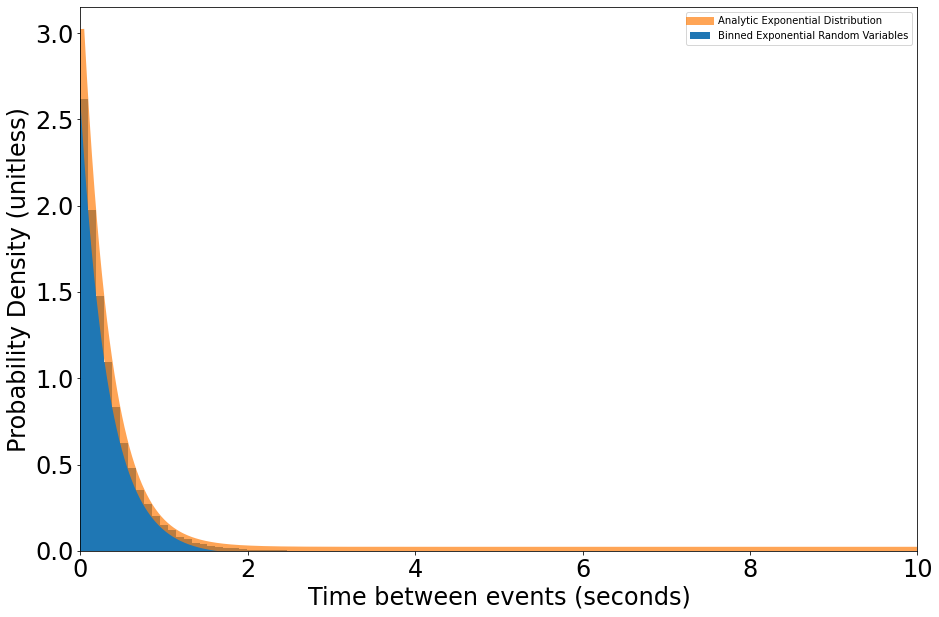

In [106]:
# We'll take the samples, group them into 50 bins, and normalize before plotting on a graph. 
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True, label='Binned Exponential Random Variables')

# Here I change the plot parameters
plt.tick_params(labelsize = 24)
plt.xlim([0,10])

# I create a linear space for x from 0 to 10, with 1000 values between, to use as input values for the analytic distribution
x = np.linspace(0,10,1000)

# Lastly, I can plot the analytic distribution with lambda = 3, again scale = 1/lambda
a = 3
ax.plot(x,stats.expon.pdf(x, loc = 0, scale = 1/a), linewidth = 8, alpha = 0.7, label='Analytic Exponential Distribution')
plt.legend()
plt.xlabel('Time between events (seconds)', fontsize = 24)
plt.ylabel('Probability Density (unitless)', fontsize = 24)
plt.show()

What happens if I plot this on a semi-log graph? Plotting a Gaussian on a semi-log graph shows an upside-down parabola. For an exponential distribution, you would expect a negative linear plot.

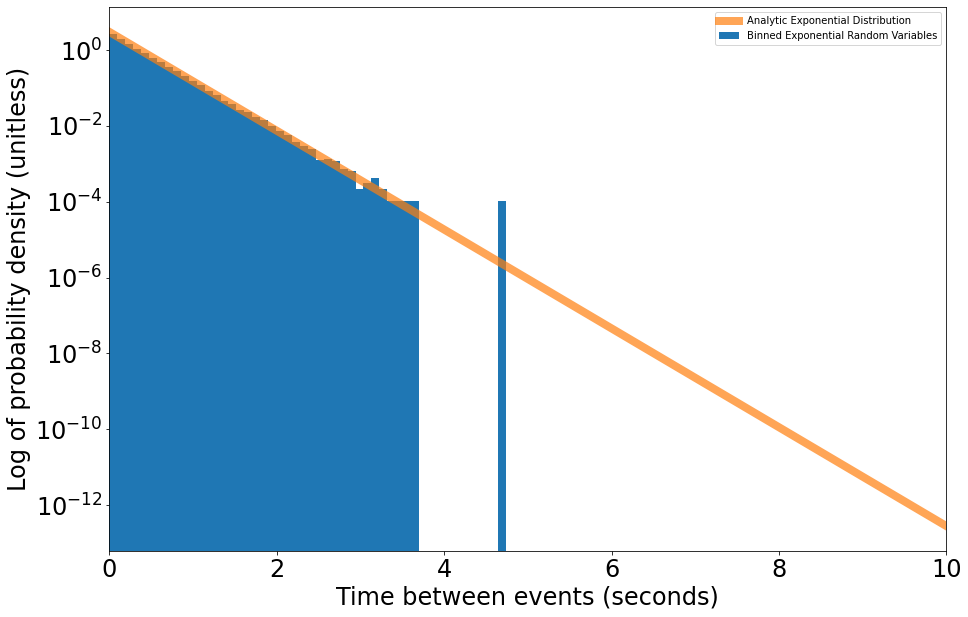

In [130]:
# We will repeat all of the steps before, except we will plot it on a graph where y is on log-scale. 
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True, label='Binned Exponential Random Variables')

plt.tick_params(labelsize = 24)
plt.xlim([0,10])

x = np.linspace(0,10,1000)

a = 3
ax.plot(x,stats.expon.pdf(x, loc = 0, scale = 1/a), linewidth = 8, alpha = 0.7, label='Analytic Exponential Distribution')
plt.yscale('log')
plt.xlabel('Time between events (seconds)', fontsize = 24)
plt.ylabel('Log of probability density (unitless)', fontsize = 24)
plt.legend()
plt.show()

As we can see, the semi-log plot of the exponential distribution looks approximately linear, which is what we were expecting.

##### Part 3

Next, I will imagine I have some signal-free data that follows an exponential distribution with a constant rate parameter $\lambda$ = 2, for instance 2 events per hour. In this hypothetical scenario, I have a specific measurement of x = 1.8 events, and I would like to know the answer to the following question:

**"What is the probability that the data produced a signal that is equally or more signal-like than what I observed?"**

In other words, what are the odds that the data point x = 1.8 was produced by background noise?

We can represent the answer to this question mathematically with the following integral:

$$ \text{Probability =} \int_{1.8}^{\infty}\text{ pdf(x) dx = }\int_{1.8}^{\infty}\lambda e^{-\lambda x} \text{dx} = \int_{1.8}^{\infty}2 e^{-2 x} \text{dx}$$

Let's calculate this probability for x = 1.8 and convert it into an equivalent sigma value.

In [138]:
x = 1.8
m = 2
prob_expon = 1 - stats.expon.cdf(x, scale = 1/m)
print(f'The probability that the data produced a signal equally or more signal-like that what I observed is {prob_expon:.6f}.')

The probability that the data produced a signal equally or more signal-like that what I observed is 0.027324.


In [139]:
# Convert into equivalent sigma value
sigma_expon = -stats.norm.ppf(prob_expon)
print(f'The corresponding sigma probability for this is {sigma_expon:.4f}.')

The corresponding sigma probability for this is 1.9217.


##### Part 4
I can try a few different values of observed data to look for patterns in the probability and sigma values.

In [110]:
x1 = 3
x2 = 5
x3 = 10

prob_expon1 = 1 - stats.expon.cdf(x1)
prob_expon2 = 1 - stats.expon.cdf(x2)
prob_expon3 = 1 - stats.expon.cdf(x3)

sigma_expon1 = -stats.norm.ppf(prob_expon1)
sigma_expon2 = -stats.norm.ppf(prob_expon2)
sigma_expon3 = -stats.norm.ppf(prob_expon3)

print(f'The probability that the data produced a signal equally or more signal-like than x = {x1:.1f} is {prob_expon1:.6f}.')
print(f'The corresponding sigma probability for this is {sigma_expon1:.2f}.')
print(f'The probability that the data produced a signal equally or more signal-like than x = {x2:.1f} is {prob_expon2:.6f}.')
print(f'The corresponding sigma probability for this is {sigma_expon2:.2f}.')
print(f'The probability that the data produced a signal equally or more signal-like than x = {x3:.1f} is {prob_expon3:.6f}.')
print(f'The corresponding sigma probability for this is {sigma_expon3:.2f}.')

The probability that the data produced a signal equally or more signal-like than x = 3.0 is 0.049787.
The corresponding sigma probability for this is 1.65.
The probability that the data produced a signal equally or more signal-like than x = 5.0 is 0.006738.
The corresponding sigma probability for this is 2.47.
The probability that the data produced a signal equally or more signal-like than x = 10.0 is 0.000045.
The corresponding sigma probability for this is 3.91.


As I observe higher data values, the probability that the data produced a signal equally or more signal-like than that data value decreases, and the corresponding sigma increases. This makes sense, as the farther away from the mean the observed data point is, the less likely that it is for the signal-free data to produce that result.

##### Non-continuous distributions

##### Part 1A
Next, I will explore discrete distributions. In particular, I will look at the Poisson distribution, which expresses the probability of a given number of events occuring within a fixed interval of time or space, if events occur with a known constant mean rate $\lambda$, and occur independently of the time since the last event. The probability mass function (pmf) is given by the following, where k is the number of occurances (integer between 0 and $\infty$), and $\lambda$ > 0 is the constant mean rate of events occuring:
$$\text{pmf = Pr(X=k) = }\frac{\lambda^k e^{-\lambda}}{k!}$$

The Poisson cumulative distribution function (cdf) is given by:
$$\text{cdf = }e^{-\lambda} \sum_{0}^{k} \frac{\lambda^k}{k!} $$

The $\lambda^k$ and the $k!$ terms can cause overflow errors, so when using large values of k, it is recommend to instead use approximations involving gamma and ln for numerical stability.

##### Part 1B
As an example, I can plot the Poisson probability distribution for $\lambda$ = 1, 3, 5, and 10. I will do that here by generating 100k random variables that are Poisson distributed for each $\lambda$ value I am demonstrating, then plot them as a histogram with bin size 50 onto the same graph.

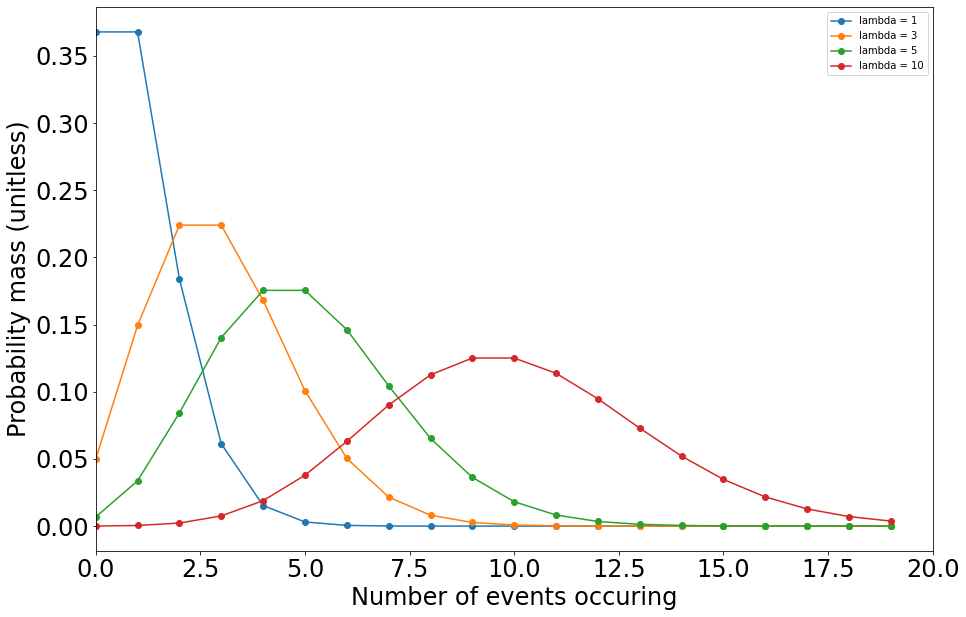

In [127]:
# Create the subplots
fig3, ax3 = plt.subplots(1, 1)

# Create a function to build arrays for x (occurences) and y (Probability mass)
def poisson(m):
    x = []
    y = []
    for i in range (0, 20):
        x.append(i)
        y.append(stats.poisson.pmf(i, m))

    return x, y

# Initialize the data with lambda = 1, 3, 5, 10 for 100k samples
m1 = 1
m2 = 3
m3 = 5
m4 = 10

# Generate the arrays of data with the different lambda values
x1, y1 = poisson(m1)
x2, y2 = poisson(m2)
x3, y3 = poisson(m3)
x4, y4 = poisson(m4)

# Plot the Poisson distributions with the different lambda values
plt.plot(x1, y1, '-o', label = 'lambda = 1')
plt.plot(x2, y2, '-o', label = 'lambda = 3')
plt.plot(x3, y3, '-o', label = 'lambda = 5')
plt.plot(x4, y4, '-o', label = 'lambda = 10')

# Here I change the plot parameters
plt.tick_params(labelsize = 24)
plt.xlim([0,20])

plt.xlabel('Number of events occuring', fontsize = 24)
plt.ylabel('Probability mass (unitless)', fontsize = 24)
plt.legend()
plt.show()

We make the following observations from this graph:
1. Each distribution has a maximum probability at their value of k = $\lambda$. This means the expected value of each distribution is equal to its corresponding $\lambda$.
2. The poisson distribution's width increases with $\lambda$. The Poisson distribution's variance is also equal to the parameter $\lambda$.

##### Part 1C
Next, I will again imagine I have some signal-free data that follows a Poisson distribution. In this hypothetical scenario, the data has an average number of occurances $\lambda$ = 1.1, and I observe 5 occurances. I would like to know the answer to the following question:

**"What is the probability that the signal-free data produced a signal that is equally or more signal-like than what I observed?"**

In other words, what are the odds that the data point x = 5 was produced by background noise?

We can represent the answer to this question mathematically with:

$$\text{Probability =  1 - cdf}(\lambda=1.1;k=5) = 1 - e^{-\lambda} \sum_{0}^{k} \frac{\lambda^k}{k!} = 1 - e^{-1.1} \sum_{0}^{5} \frac{1.1^5}{5!} $$

In [14]:
m = 1.1
k = 5
prob_poisson = 1-stats.poisson.cdf(5,1.1)
sigma_poisson = -stats.norm.ppf(prob_poisson)
print(f'The probability that the data produced a signal equally or more signal-like than my observation of 5 occurances is {prob_poisson:.6f}'
    + f' which corresponds to a sigma value of {sigma_poisson:.6f}.')

The probability that the data produced a signal equally or more signal-like than my observation of 5 occurances is 0.000968 which corresponds to a sigma value of 3.099922.


##### Part 1D

**TODO:
Think about this and discuss the implications for experiments...
When working with discrete distributions, the probabilities and sigmas must also be discrete. ...**

##### Part 1E
While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.
Another point of interest in working with discrete probability distributions is that the paramters of the distributions are not themselves discrete. This is because 